In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [7]:
### some columns are missing in table.

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

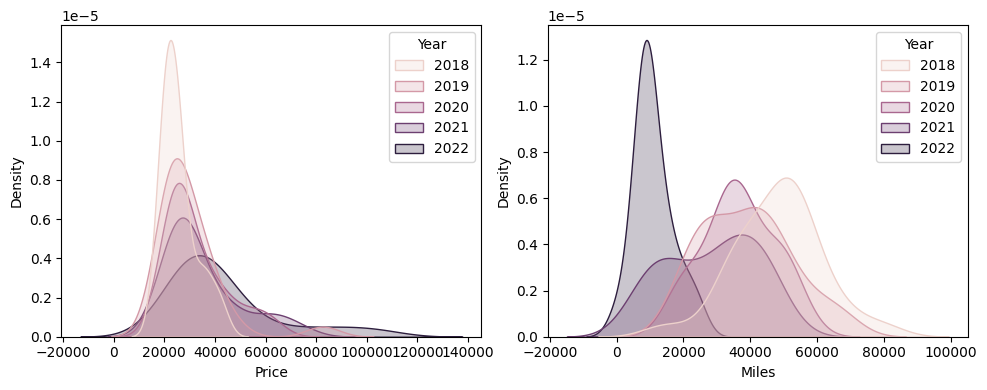

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
carvana = pd.read_csv("carvana - carvana.csv")
carvana['Brand'] = carvana['Name'].str.split().str[0]
carvana['Year'] = pd.to_numeric(carvana['Year'], errors='coerce').dropna().astype(int)
carvana = carvana[carvana['Year'].between(2018, 2022)]

# Create pivot tables
pivot_price = carvana.pivot_table(index='Brand', columns='Year', values='Price', aggfunc='mean')
pivot_miles = carvana.pivot_table(index='Brand', columns='Year', values='Miles', aggfunc='median')

# Melt data for plotting
price_data = pivot_price.reset_index().melt(id_vars='Brand', value_vars=pivot_price.columns, var_name='Year', value_name='Price')
miles_data = pivot_miles.reset_index().melt(id_vars='Brand', value_vars=pivot_miles.columns, var_name='Year', value_name='Miles')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# KDE plot for Price
sns.kdeplot(data=price_data, x='Price', hue='Year', fill=True, ax=ax1)

# KDE plot for Miles
sns.kdeplot(data=miles_data, x='Miles', hue='Year', fill=True, ax=ax2)

plt.tight_layout()
plt.show()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

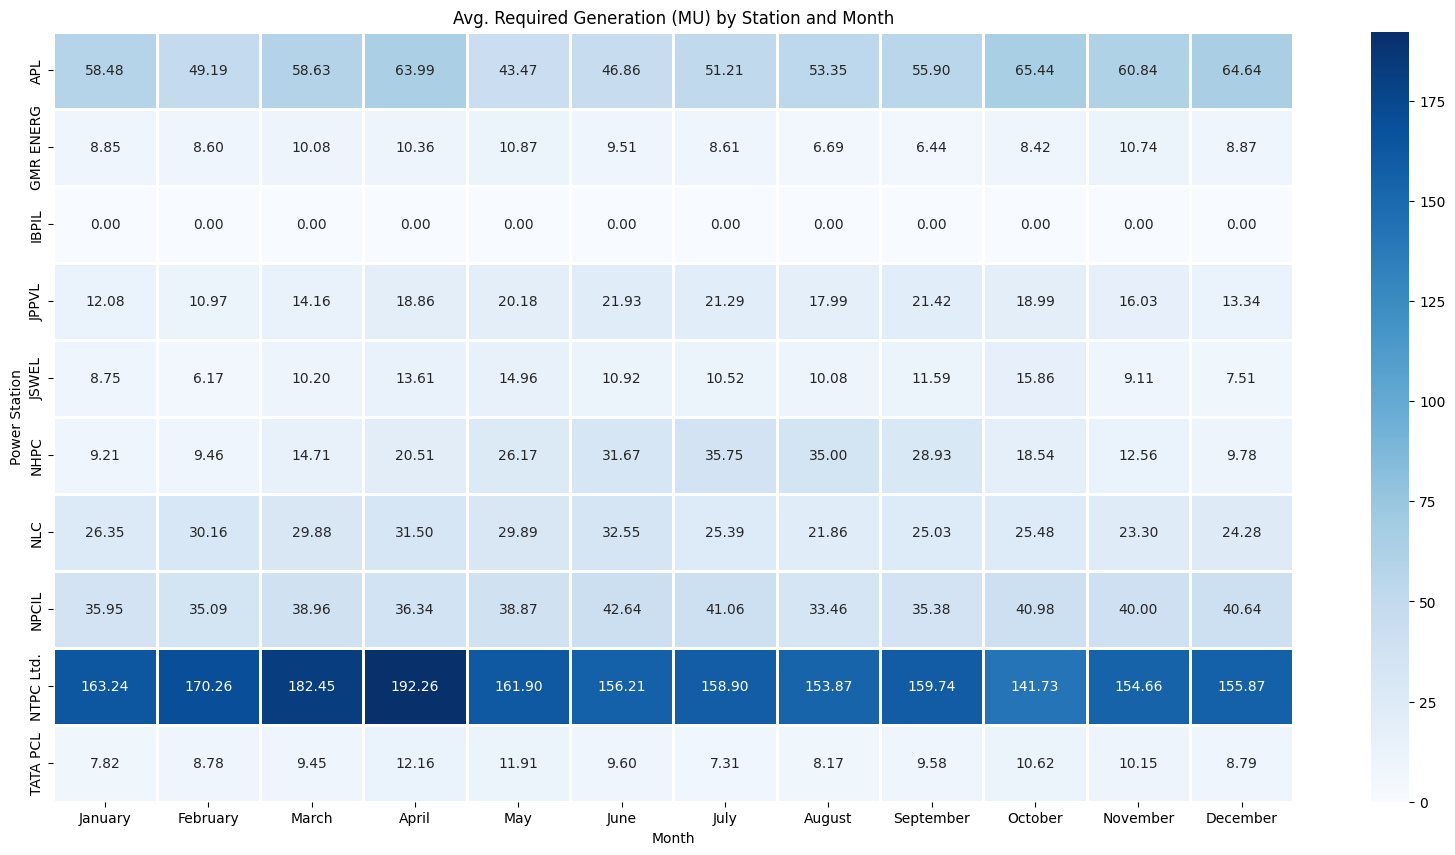

In [24]:
df = pd.read_csv("PowerGeneration - PowerGeneration.csv")

# Calculate required power generation
df['Required Generation (MU)'] = df['Actual(MU)'] + df['Excess(+) / Shortfall (-)']

# Convert 'Date' to datetime and extract month
df['Date'] = pd.to_datetime(df['Dates'])
df['Month'] = df['Date'].dt.month_name()

# Get top 10 power stations by frequency
top_stations = df['Power Station'].value_counts().head(10).index.tolist()
df_top = df[df['Power Station'].isin(top_stations)]

# Create pivot table for average required generation
pivot_table = df_top.pivot_table(index='Power Station', columns='Month', 
                                values='Required Generation (MU)', aggfunc='mean')

# Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[month_order]

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".2f",linewidths=0.9, cmap='Blues')
plt.title('Avg. Required Generation (MU) by Station and Month')
plt.xlabel('Month')
plt.ylabel('Power Station')
plt.show()


### `Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* Make sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

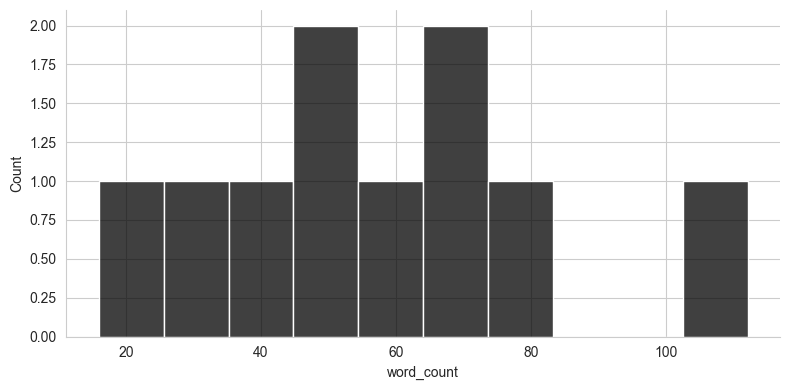

In [32]:
import pandas as pd
import seaborn as sns

# Load and process data
df = pd.read_csv("question-answer.csv", header=None, names=["Index", "Text"])
questions = df[df["Text"].str.startswith("Q")]["Text"].str.replace(r"^Q\d+-", "", regex=True).str.strip()
answers = df[df["Text"].str.startswith("Ans")]["Text"].str.replace(r"^Ans\d+-", "", regex=True).str.strip()
final_df = pd.DataFrame({"question": questions.reset_index(drop=True), "answer": answers.reset_index(drop=True)})

# Calculate word count
final_df["word_count"] = final_df["answer"].str.split().str.len()

# Set Seaborn style and plot
sns.set_style("whitegrid")
sns.displot(data=final_df, x="word_count", kind="hist", bins=10, color="black", height=4, aspect=2)
sns.despine()

In [37]:
final_df

,question,answer,word_count
0,What is Data Science?,"Data Science combines statistics, maths, speci...",45
1,2. How is logistic regression done?,Logistic regression measures the relationship ...,34
2,How do you build a random forest model?,A random forest is built up of a number of dec...,112
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...,72
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...,80
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...,49
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...,60
7,What is a time series?,A time series is a set of observations ordered...,16
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...,40
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...,64


### `Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [36]:
# Filter questions without a question mark
no_question_mark = final_df[~final_df["question"].str.contains(r"\?", regex=True)]

# Print questions and answers or indicate if none found
if no_question_mark.empty:
    print("No questions found without a question mark.")
else:
    for idx, row in no_question_mark.iterrows():
        print(f"Question: {row['question']}")
        print(f"Answer: {row['answer']}\n")

No questions found without a question mark.


### `Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [42]:
import pandas as pd

# Load datasets
log_file =pd.read_csv("equip_log - equip_log.csv")
employee = pd.read_csv("employee - employee.csv")
# Convert timestamp and add Month/Weekday
log_file['timestamp'] = pd.to_datetime(log_file['dt'])
log_file['Month'] = log_file['timestamp'].dt.strftime('%B')
log_file['Weekday'] = log_file['timestamp'].dt.day_name()
log_file['Is_Weekend'] = log_file['Weekday'].isin(['Saturday', 'Sunday'])

# Q6: Month-wise activity count
print("Q6 - Month-wise activity count:")
log_file.groupby(['Month', 'activity']).size().reset_index(name='Count').sort_values(['Month', 'Count'], ascending=[True, False])


Q6 - Month-wise activity count:


,Month,activity,Count
1,April,Cleaning,11
2,April,Inspection,9
0,April,Checking,5
3,April,Repair,5
5,August,Cleaning,10
6,August,Inspection,9
4,August,Checking,8
7,August,Repair,4
10,December,Inspection,12
9,December,Cleaning,7


In [53]:
# Q7: Employee with most activity in January
top_emp_jan = log_file[log_file['Month'] == 'January']['emp_id'].value_counts().idxmax()
full_name_jan = employee[employee['EMPLOYEE_ID'] == top_emp_jan][['FIRST_NAME', 'LAST_NAME']].agg(' '.join, axis=1).iloc[0]
print(f"Q7 - Employee with most activity in January: {full_name_jan} (ID: {top_emp_jan})")


Q7 - Employee with most activity in January: Payam Kaufling (ID: 122)


In [58]:
# Q8: Employee with most weekend activity
top_emp_weekend = log_file[log_file['Is_Weekend']]['emp_id'].value_counts().idxmax()
emp_weekend = employee[employee['EMPLOYEE_ID'] == top_emp_weekend]
full_name_weekend = emp_weekend[['FIRST_NAME', 'LAST_NAME']].agg(' '.join, axis=1).iloc[0] if not emp_weekend.empty else "Unknown"
print(f"Q8 - Employee with most weekend activity: {full_name_weekend} (ID: {top_emp_weekend})")
print("--"*70)

Q8 - Employee with most weekend activity: Unknown (ID: 144)
--------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Q9: Most logged activity on business days
top_activity = log_file[~log_file['Is_Weekend']]['activity'].value_counts().idxmax()
print(f"Q9 - Most logged activity on business days: {top_activity}")
print("--"*70)

Q9 - Most logged activity on business days: Inspection
--------------------------------------------------------------------------------------------------------------------------------------------


Q10 - Weekday-wise activity table:
activity   Checking  Cleaning  Inspection  Repair
Weekday                                          
Friday            8        16          20       9
Monday           10        14          13      15
Saturday         18        11           8      15
Sunday           13        13          15      11
Thursday          8        16          16      12
Tuesday          15         9          15      13
Wednesday        14         9          13      16
--------------------------------------------------------------------------------------------------------------------------------------------


<Axes: xlabel='activity', ylabel='Weekday'>

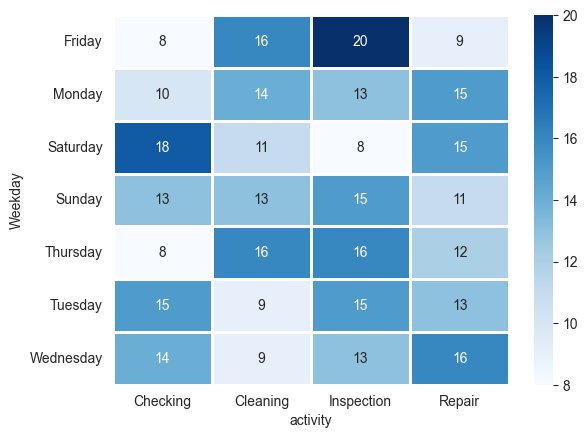

In [61]:
# Q10: Weekday-wise activity table and Seaborn heatmap
print("Q10 - Weekday-wise activity table:")
crosstab = pd.crosstab(log_file['Weekday'], log_file['activity'])
print(crosstab)
print("--"*70)
sns.set_style("whitegrid")
sns.heatmap(crosstab, linewidths=0.99, annot=True, fmt="d", cmap="Blues")

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

Q11.3 - Employees with names starting with 'A' and activities in ['Inspection', 'Cleaning', 'Checking']:
3     Alexander Hunold
15      Alexander Khoo
21             A Fripp
Name: FULL_NAME, dtype: object
--------------------------------------------------------------------------------------------------------------------------------------------


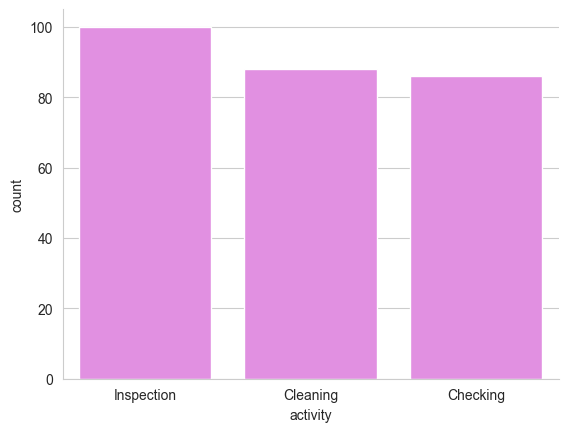

In [64]:
# Q11.1: Fill missing FIRST_NAME from EMAIL and LAST_NAME
employee['FIRST_NAME'] = employee.apply(lambda x: x['EMAIL'][:-len(x['LAST_NAME'])] if pd.isna(x['FIRST_NAME']) or x['FIRST_NAME'] == '' else x['FIRST_NAME'], axis=1)

# Q11.2: Add @campusx.com to EMAIL
employee['EMAIL'] = employee['EMAIL'].str.lower() + '@campusx.com'

# Q11.3: Employees with names starting with 'A' and specific activities
employee['FULL_NAME'] = employee[['FIRST_NAME', 'LAST_NAME']].agg(' '.join, axis=1)
a_emp = employee[employee['FULL_NAME'].str.startswith('A') & employee['EMPLOYEE_ID'].isin(log_file[log_file['activity'].isin(['Inspection', 'Cleaning', 'Checking'])]['emp_id'])]['FULL_NAME']
print("Q11.3 - Employees with names starting with 'A' and activities in ['Inspection', 'Cleaning', 'Checking']:")
print(a_emp if not a_emp.empty else "No matching employees found.")
print("--"*70)

# Seaborn countplot
sns.set_style("whitegrid")
sns.countplot(data=log_file[log_file['activity'].isin(['Inspection', 'Cleaning', 'Checking'])], x='activity', order=['Inspection', 'Cleaning', 'Checking'], color='violet')
sns.despine()

